In [1]:
school_id = 601 # MSU's school id

scraper = RMPscraper(base=f"https://www.ratemyprofessors.com/search/professors/{school_id}?q=*")
scraper.find_click(".CCPAModal__StyledCloseButton-sc-10x9kq-2") # Closes cookies popup
scraper.expand_all(max_iters=20)
page = scraper.source()
scraper.driver.quit()

cards, SCHEMA_cards = get_card_info(page)
save_info(cards, "test_schools", SCHEMA_cards)

NameError: name 'RMPscraper' is not defined

In [ ]:
prof_id = 4183 # random school id

scraper = RMPscraper(base=f"https://www.ratemyprofessors.com/professor/{prof_id}", headless=False) # should be headless in prod
scraper.find_click(".CCPAModal__StyledCloseButton-sc-10x9kq-2") # Closes cookies popup
scraper.expand_all(max_iters=5)
page = scraper.source()
scraper.driver.quit()

ratings, SCHEMA_profs = get_ratings(page, prof_id)
save_info(ratings, "test_ratings", SCHEMA_profs)

I implemented a few utils for scraping in the `RMPscraper.py` and `SchoolScraper.py` files. The code below scrapes Rate My Professors's MSU professor search page, collecting basic info about each of the professors:
- name
- prof_id: the numeric id that can be used to access their RMP page
- school
- department
- num_ratings: the number of ratings they have received

This data is then saved to a CSV file (called "test.csv" right now). 

In [2]:
from scrape_profs import scrape_profs
from scrape_schools import scrape_schools

In [ ]:
scrape_schools(601, "MSU_profs", max_iters=2000)
scrape_profs("MSU_profs.csv", "MSU_ratings")

# Visualizations

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
ratings = pd.read_csv("MSU_ratings.csv")

In [5]:
ratings.columns

Index(['prof_id', 'course', 'date', 'quality', 'difficulty', 'comments',
       'thumbs_up', 'thumbs_down'],
      dtype='object')

In [51]:
q_counts = ratings["quality"].value_counts().to_dict()
pos = 0
for key, count in q_counts.items():
    if key >= 3:
        pos += count
pos

8942

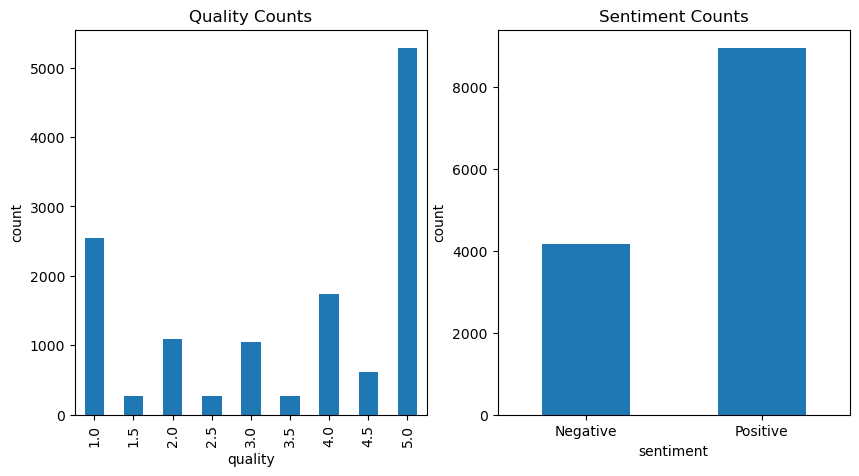

In [60]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
ax1, ax2 = axes

q_scores = ratings["quality"].value_counts().sort_index()
q_scores.plot.bar(ax=ax1)
ax1.set_ylabel("count")
ax1.set_xlabel("quality")
ax1.set_title("Quality Counts")

sentiment = (ratings["quality"] >= 3).value_counts()
sentiment.plot.bar(ax=ax2)
ax2.set_xticklabels(["Positive", "Negative"], rotation=0)
ax2.invert_xaxis()
ax2.set_xlabel("sentiment")
ax2.set_ylabel("count")
ax2.set_title("Sentiment Counts")

fig.savefig("Data_Imbalance.png")

In [66]:
cleaned = ratings[ratings["comments"] != "No Comments"]

In [72]:
prof_counts = cleaned["prof_id"].value_counts()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


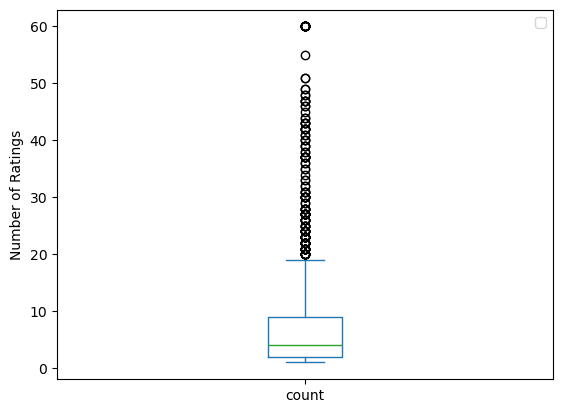

In [87]:
ax = prof_counts.plot.box()
ax.set_ylabel("Number of Ratings")
ax.legend()
ax.figure.savefig("Professor_Reviews.png")

In [89]:
prof_counts.describe()

count    1662.000000
mean        7.699759
std        10.206217
min         1.000000
25%         2.000000
50%         4.000000
75%         9.000000
max        60.000000
Name: count, dtype: float64